# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

from scipy import stats
from scipy.stats import linregress

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#set style for plots 
plt.style.use("seaborn")

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

lat_lngs = zip(lats, lngs)

#city_coords = []
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
#        city_coords.append(lat_lng)

# Print the city count to confirm sufficient count
len(cities)

599

In [3]:
cities

['polessk',
 'kaka',
 'warrnambool',
 'port alfred',
 'abha',
 'yeppoon',
 'acapulco',
 'tuatapere',
 'bambous virieux',
 'cherskiy',
 'punta arenas',
 'rikitea',
 'yellowknife',
 'kaitangata',
 'illoqqortoormiut',
 'velingara',
 'nadym',
 'gallup',
 'ushuaia',
 'barentsburg',
 'hithadhoo',
 'cockburn town',
 'caravelas',
 'kavali',
 'inirida',
 'cape town',
 'pavlohrad',
 'lebu',
 'new norfolk',
 'honiara',
 'tasiilaq',
 'tilichiki',
 'baft',
 'mys shmidta',
 'bluff',
 'hofn',
 'kahului',
 'slave lake',
 'saint-philippe',
 'kodiak',
 'ponta do sol',
 'burns lake',
 'labuhan',
 'cidreira',
 'albany',
 'mataura',
 'puerto ayora',
 'korla',
 'jining',
 'busselton',
 'chapais',
 'kapaa',
 'normandin',
 'bambanglipuro',
 'pochutla',
 'halalo',
 'aklavik',
 'grand-lahou',
 'elsterwerda',
 'vaini',
 'taolanaro',
 'itarema',
 'avarua',
 'hobart',
 'lorengau',
 'komsomolskiy',
 'port elizabeth',
 'kurchum',
 'mpanda',
 'kadi',
 'diu',
 'lagoa',
 'laguna',
 'constantine',
 'grand river south ea

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
'''
csv columns 
 City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
'''

# #setup lists to hold response info 
city_found = []
country = []
lat  =[]
long = []
date = []
temp = []
wind_speed = []
cloudiness = []
humidity = []


#build url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

#build partial query_url
query_url = f"{url}appid={api_key}&units={units}&q="

count = 1 
for city in cities:  
    
    response = requests.get(query_url + city).json()

        
    try: 
        #city_found.append(response['name'])
        print("Found City: " + city)
       
        country.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        date.append(response['dt'])
        temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        cloudiness.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
        city_found.append(city)
        print(f"city  {count} | {city}")
        print(f"{url}&q={city}")
        
        count = count + 1
    
    except KeyError:
        
      print('Error. No city, skip.')
        


# print(f"The latitude: {lat}")
# print(f"The temperature: {temp}")


Found City: polessk
city  1 | polessk
http://api.openweathermap.org/data/2.5/weather?&q=polessk
Found City: kaka
city  2 | kaka
http://api.openweathermap.org/data/2.5/weather?&q=kaka
Found City: warrnambool
city  3 | warrnambool
http://api.openweathermap.org/data/2.5/weather?&q=warrnambool
Found City: port alfred
city  4 | port alfred
http://api.openweathermap.org/data/2.5/weather?&q=port alfred
Found City: abha
city  5 | abha
http://api.openweathermap.org/data/2.5/weather?&q=abha
Found City: yeppoon
city  6 | yeppoon
http://api.openweathermap.org/data/2.5/weather?&q=yeppoon
Found City: acapulco
city  7 | acapulco
http://api.openweathermap.org/data/2.5/weather?&q=acapulco
Found City: tuatapere
city  8 | tuatapere
http://api.openweathermap.org/data/2.5/weather?&q=tuatapere
Found City: bambous virieux
city  9 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?&q=bambous virieux
Found City: cherskiy
city  10 | cherskiy
http://api.openweathermap.org/data/2.5/weather?&q=chersk

Found City: cabo san lucas
city  80 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?&q=cabo san lucas
Found City: khatanga
city  81 | khatanga
http://api.openweathermap.org/data/2.5/weather?&q=khatanga
Found City: richards bay
city  82 | richards bay
http://api.openweathermap.org/data/2.5/weather?&q=richards bay
Found City: storslett
city  83 | storslett
http://api.openweathermap.org/data/2.5/weather?&q=storslett
Found City: utiel
city  84 | utiel
http://api.openweathermap.org/data/2.5/weather?&q=utiel
Found City: avera
city  85 | avera
http://api.openweathermap.org/data/2.5/weather?&q=avera
Found City: clearwater
city  86 | clearwater
http://api.openweathermap.org/data/2.5/weather?&q=clearwater
Found City: axim
city  87 | axim
http://api.openweathermap.org/data/2.5/weather?&q=axim
Found City: yaan
city  88 | yaan
http://api.openweathermap.org/data/2.5/weather?&q=yaan
Found City: ulaangom
city  89 | ulaangom
http://api.openweathermap.org/data/2.5/weather?&q=ulaangom
Fou

Found City: arraial do cabo
city  156 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?&q=arraial do cabo
Found City: mar del plata
city  157 | mar del plata
http://api.openweathermap.org/data/2.5/weather?&q=mar del plata
Found City: mehamn
city  158 | mehamn
http://api.openweathermap.org/data/2.5/weather?&q=mehamn
Found City: port lincoln
city  159 | port lincoln
http://api.openweathermap.org/data/2.5/weather?&q=port lincoln
Found City: ketchikan
city  160 | ketchikan
http://api.openweathermap.org/data/2.5/weather?&q=ketchikan
Found City: maltahohe
city  161 | maltahohe
http://api.openweathermap.org/data/2.5/weather?&q=maltahohe
Found City: saint charles
city  162 | saint charles
http://api.openweathermap.org/data/2.5/weather?&q=saint charles
Found City: constitucion
city  163 | constitucion
http://api.openweathermap.org/data/2.5/weather?&q=constitucion
Found City: forbes
city  164 | forbes
http://api.openweathermap.org/data/2.5/weather?&q=forbes
Found City: torbay
cit

Found City: gold coast
city  232 | gold coast
http://api.openweathermap.org/data/2.5/weather?&q=gold coast
Found City: wanderlandia
Error. No city, skip.
Found City: pingliang
city  233 | pingliang
http://api.openweathermap.org/data/2.5/weather?&q=pingliang
Found City: henties bay
city  234 | henties bay
http://api.openweathermap.org/data/2.5/weather?&q=henties bay
Found City: berlevag
city  235 | berlevag
http://api.openweathermap.org/data/2.5/weather?&q=berlevag
Found City: nerchinskiy zavod
city  236 | nerchinskiy zavod
http://api.openweathermap.org/data/2.5/weather?&q=nerchinskiy zavod
Found City: lerwick
city  237 | lerwick
http://api.openweathermap.org/data/2.5/weather?&q=lerwick
Found City: madridejos
city  238 | madridejos
http://api.openweathermap.org/data/2.5/weather?&q=madridejos
Found City: bethel
city  239 | bethel
http://api.openweathermap.org/data/2.5/weather?&q=bethel
Found City: nouadhibou
city  240 | nouadhibou
http://api.openweathermap.org/data/2.5/weather?&q=nouadhi

Found City: broome
city  311 | broome
http://api.openweathermap.org/data/2.5/weather?&q=broome
Found City: banjar
city  312 | banjar
http://api.openweathermap.org/data/2.5/weather?&q=banjar
Found City: coihaique
city  313 | coihaique
http://api.openweathermap.org/data/2.5/weather?&q=coihaique
Found City: goiatuba
city  314 | goiatuba
http://api.openweathermap.org/data/2.5/weather?&q=goiatuba
Found City: phan rang
Error. No city, skip.
Found City: coquimbo
city  315 | coquimbo
http://api.openweathermap.org/data/2.5/weather?&q=coquimbo
Found City: marsa matruh
city  316 | marsa matruh
http://api.openweathermap.org/data/2.5/weather?&q=marsa matruh
Found City: sangar
city  317 | sangar
http://api.openweathermap.org/data/2.5/weather?&q=sangar
Found City: mana
city  318 | mana
http://api.openweathermap.org/data/2.5/weather?&q=mana
Found City: ilulissat
city  319 | ilulissat
http://api.openweathermap.org/data/2.5/weather?&q=ilulissat
Found City: gisborne
city  320 | gisborne
http://api.openwe

Found City: bonavista
city  387 | bonavista
http://api.openweathermap.org/data/2.5/weather?&q=bonavista
Found City: taltal
city  388 | taltal
http://api.openweathermap.org/data/2.5/weather?&q=taltal
Found City: sosnovo-ozerskoye
city  389 | sosnovo-ozerskoye
http://api.openweathermap.org/data/2.5/weather?&q=sosnovo-ozerskoye
Found City: khash
city  390 | khash
http://api.openweathermap.org/data/2.5/weather?&q=khash
Found City: ouadda
city  391 | ouadda
http://api.openweathermap.org/data/2.5/weather?&q=ouadda
Found City: launceston
city  392 | launceston
http://api.openweathermap.org/data/2.5/weather?&q=launceston
Found City: sfantu gheorghe
city  393 | sfantu gheorghe
http://api.openweathermap.org/data/2.5/weather?&q=sfantu gheorghe
Found City: jawhar
city  394 | jawhar
http://api.openweathermap.org/data/2.5/weather?&q=jawhar
Found City: ola
city  395 | ola
http://api.openweathermap.org/data/2.5/weather?&q=ola
Found City: biak
city  396 | biak
http://api.openweathermap.org/data/2.5/wea

Found City: taywarah
city  466 | taywarah
http://api.openweathermap.org/data/2.5/weather?&q=taywarah
Found City: parati
city  467 | parati
http://api.openweathermap.org/data/2.5/weather?&q=parati
Found City: agadir
city  468 | agadir
http://api.openweathermap.org/data/2.5/weather?&q=agadir
Found City: quetzaltepec
Error. No city, skip.
Found City: warqla
Error. No city, skip.
Found City: anamur
city  469 | anamur
http://api.openweathermap.org/data/2.5/weather?&q=anamur
Found City: muros
city  470 | muros
http://api.openweathermap.org/data/2.5/weather?&q=muros
Found City: kourou
city  471 | kourou
http://api.openweathermap.org/data/2.5/weather?&q=kourou
Found City: porangatu
city  472 | porangatu
http://api.openweathermap.org/data/2.5/weather?&q=porangatu
Found City: maliq
city  473 | maliq
http://api.openweathermap.org/data/2.5/weather?&q=maliq
Found City: mananara
city  474 | mananara
http://api.openweathermap.org/data/2.5/weather?&q=mananara
Found City: labuan
city  475 | labuan
http

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
#create a dataframe and display it 

weather_data = pd.DataFrame({
    "City Name": city_found, 
    "Country Name": country, 
    "Latitude": lat,
    "Longitude": long,
    "Date": date, 
    "Max Temperature": temp, 
    "Wind Speed": wind_speed, 
    "Cloudiness": cloudiness,
    "Humidity": humidity
})

weather_data.to_csv('/Users/tmc/Desktop/HW_6_API_Python_Challenge/WeatherPy/output_csv_file/weather_data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [16]:
#check to see what the max humidity
print(f" The max humidity of any city is: {max(humidity)}")

'''
No city is >100 Humidity
'''

 The max humidity of any city is: 100


'\nNo city is >100 Humidity\n'

In [17]:
#  Get the indices of cities that have humidity over 100%.


In [18]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

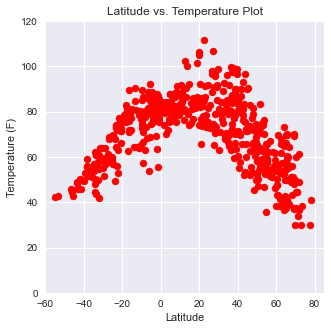

In [72]:
#scatter plot 
plt.figure(figsize=(5,5))
plt.scatter(weather_data['Latitude'], weather_data['Max Temperature'], c='red', s=50)
plt.title("Latitude vs. Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.xlim(-60,85)
plt.ylim(0,120)
#save plot 
plt.savefig('/Users/tmc/Desktop/HW_6_API_Python_Challenge/WeatherPy/output_data/latitude_vs_temp_plot.png')
#display the plot 
plt.show()

## Latitude vs. Humidity Plot

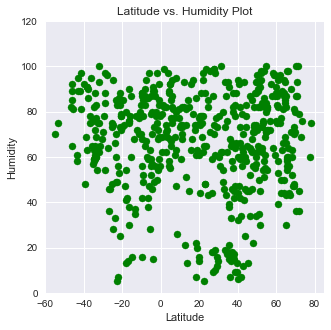

In [73]:
plt.figure(figsize=(5,5))
plt.scatter(weather_data['Latitude'], weather_data['Humidity'], color='green', s=50)
plt.title("Latitude vs. Humidity Plot")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.xlim(-60,85)
plt.ylim(0,120)

plt.savefig('/Users/tmc/Desktop/HW_6_API_Python_Challenge/WeatherPy/output_data/latitude_vs_humidity_plot.png')

## Latitude vs. Cloudiness Plot

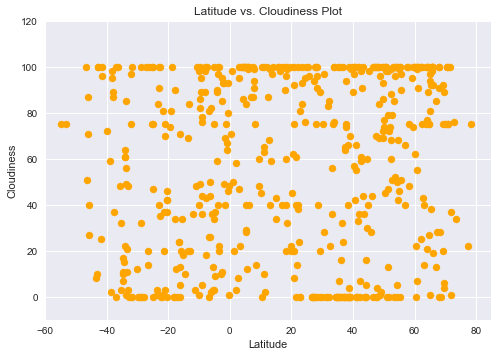

In [76]:

plt.scatter(weather_data['Latitude'], weather_data['Cloudiness'], color='orange', s=50)
plt.title("Latitude vs. Cloudiness Plot")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.xlim(-60,85)
plt.ylim(-10,120)

plt.savefig('/Users/tmc/Desktop/HW_6_API_Python_Challenge/WeatherPy/output_data/latitude_vs_cloud_plot.png')

## Latitude vs. Wind Speed Plot

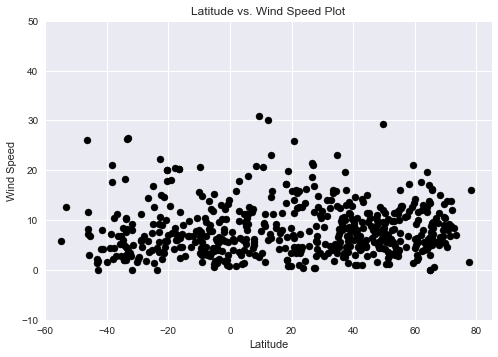

In [78]:

plt.scatter(weather_data['Latitude'], weather_data['Wind Speed'], color='black', s=50)

x_values = weather_data['Latitude']
y_values = weather_data['Wind Speed']
plt.title("Latitude vs. Wind Speed Plot")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.xlim(-60,85)
plt.ylim(-10,50)

plt.savefig('/Users/tmc/Desktop/HW_6_API_Python_Challenge/WeatherPy/output_data/latitude_vs_wind_plot')

## Linear Regression

In [13]:
# # Perform a linear regression on temperature vs. latitude
# (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# # Get regression values
# regress_values = x_values * slope + intercept
# #print(regress_values)

# # Create line equation string
# line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -0.3x +40.03
The r-value is: 0.018336776831152875.


None

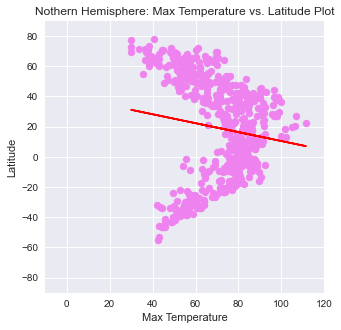

In [86]:

'''
    "City Name": city_found, 
    "Country Name": country, 
    "Latitude": lat,
    "Longitude": long,
    "Date": date, 
    "Max Temperature": temp, 
    "Wind Speed": wind_speed, 
    "Cloudiness": cloudiness,
    "Humidity": humidity
'''

#limit the coordinates to the northern hemisphere
#Range of latitudes and longitudes
lat_range = (0, 90)
lng_range = (0, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
#        city_coords.append(lat_lng)



plt.figure(figsize=(5,5))
plt.scatter(weather_data['Max Temperature'], weather_data['Latitude'], color='violet', s=50)

x_values = weather_data['Max Temperature']
y_values = weather_data['Latitude']



# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.title("Nothern Hemisphere: Max Temperature vs. Latitude Plot")
plt.xlabel("Max Temperature")
plt.ylabel("Latitude")
plt.savefig('northern_hemisphere_max_temp_vs_latitude_plot')
plt.xlim(-10,120)
plt.ylim(-90,90)

print(line_eq)
display(print(f"The r-value is: {rvalue**2}."))


plt.savefig('/Users/tmc/Desktop/HW_6_API_Python_Challenge/WeatherPy/output_data/northern_hemisphere_max_temp_vs_latitude_plot')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -0.3x +40.03
The r-value is: 0.018336776831152875.


None

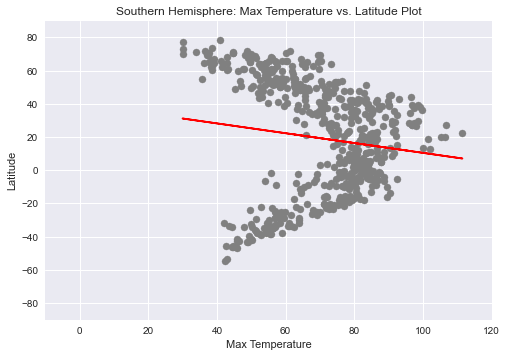

In [87]:

#limit the coordinates to the southern hemisphere
#Range of latitudes and longitudes
lat_range = (-90, 0)
lng_range = (-180, 0)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


plt.scatter(weather_data['Max Temperature'], weather_data['Latitude'], color='grey', s=50)

x_values = weather_data['Max Temperature']
y_values = weather_data['Latitude']


# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.title("Southern Hemisphere: Max Temperature vs. Latitude Plot")
plt.xlabel("Max Temperature")
plt.ylabel("Latitude")
plt.savefig('southern_hemisphere_max_temp_vs_latitude_plot')
plt.xlim(-10,120)
plt.ylim(-90,90)

print(line_eq)
display(print(f"The r-value is: {rvalue**2}."))


plt.savefig('/Users/tmc/Desktop/HW_6_API_Python_Challenge/WeatherPy/output_data/southern_hemisphere_max_temp_vs_latitude_plot')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = -0.07x +23.94
The r-value is: 0.002058592423076003.


None

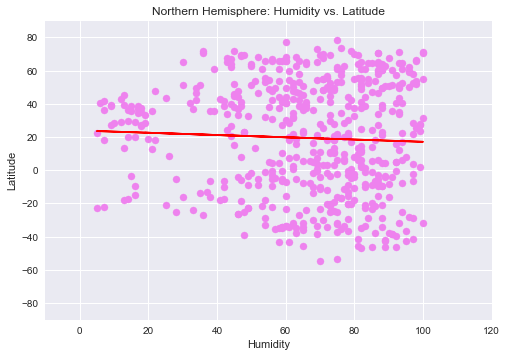

In [88]:
#limit the coordinates to the northern hemisphere
#Range of latitudes and longitudes
lat_range = (0, 90)
lng_range = (0, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)




plt.scatter(weather_data['Humidity'], weather_data['Latitude'], color='violet', s=50)

x_values = weather_data['Humidity']
y_values = weather_data['Latitude']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.plot(x_values,regress_values,"r-")
plt.title("Northern Hemisphere: Humidity vs. Latitude")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.savefig('northern_hemisphere_humidity_vs_latitude_plot')
plt.xlim(-10,120)
plt.ylim(-90,90)

print(line_eq)
display(print(f"The r-value is: {rvalue**2}."))

plt.savefig('/Users/tmc/Desktop/HW_6_API_Python_Challenge/WeatherPy/output_data/northern_hemisphere_humidity_vs_latitude_plot')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = -0.07x +23.94
The r-value is: 0.002058592423076003.


None

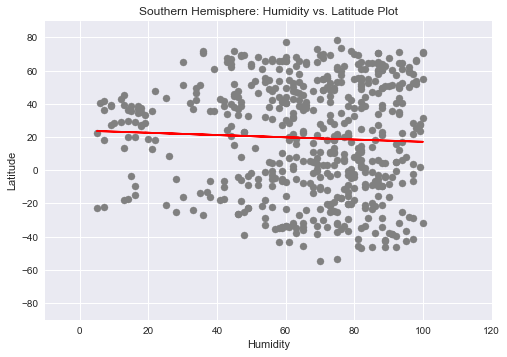

In [89]:

#limit the coordinates to the southern hemisphere
#Range of latitudes and longitudes
lat_range = (-90, 0)
lng_range = (-180, 0)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


plt.scatter(weather_data['Humidity'], weather_data['Latitude'], color='grey', s=50)

x_values = weather_data['Humidity']
y_values = weather_data['Latitude']

plt.plot(x_values,regress_values,"r-")



plt.title("Southern Hemisphere: Humidity vs. Latitude Plot")
plt.xlabel("Humidity")
plt.ylabel("Latitude")

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.savefig('southern_hemisphere_humidity_vs_latitude_plot')
plt.xlim(-10,120)
plt.ylim(-90,90)
print(line_eq)
display(print(f"The r-value is: {rvalue**2}."))
plt.savefig('/Users/tmc/Desktop/HW_6_API_Python_Challenge/WeatherPy/output_data/southern_hemisphere_humidity_vs_latitude_plot')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.12x +12.47
The r-value is: 0.01956970818305438.


None

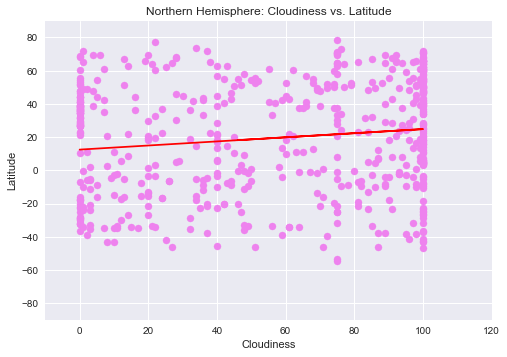

In [90]:
#limit the coordinates to the northern hemisphere
#Range of latitudes and longitudes
lat_range = (0, 90)
lng_range = (0, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)




plt.scatter(weather_data['Cloudiness'], weather_data['Latitude'], color='violet', s=50)

x_values = weather_data['Cloudiness']
y_values = weather_data['Latitude']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.xlim(0,100)
plt.ylim(0,90)
plt.plot(x_values,regress_values,"r-")
plt.title("Northern Hemisphere: Cloudiness vs. Latitude")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.savefig('northern_hemisphere_cloudiness_vs_latitude_plot')
plt.xlim(-10,120)
plt.ylim(-90,90)
print(line_eq)
display(print(f"The r-value is: {rvalue**2}."))

plt.savefig('/Users/tmc/Desktop/HW_6_API_Python_Challenge/WeatherPy/output_data/northern_hemisphere_cloudiness_vs_latitude_plot')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.12x +12.47
The r-value is: 0.01956970818305438.


None

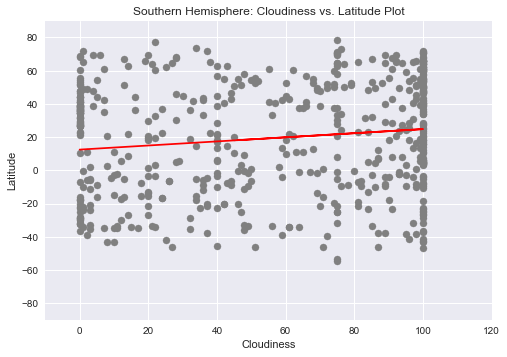

In [91]:

#limit the coordinates to the Southern hemisphere
#Range of latitudes and longitudes
lat_range = (-90, 0)
lng_range = (-180, 0)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


plt.scatter(weather_data['Cloudiness'], weather_data['Latitude'], color='grey', s=50)

x_values = weather_data['Cloudiness']
y_values = weather_data['Latitude']

plt.plot(x_values,regress_values,"r-")



plt.title("Southern Hemisphere: Cloudiness vs. Latitude Plot")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.savefig('southern_hemisphere_cloudiness_vs_latitude_plot')
plt.xlim(-10,120)
plt.ylim(-90,90)
print(line_eq)
display(print(f"The r-value is: {rvalue**2}."))
plt.savefig('/Users/tmc/Desktop/HW_6_API_Python_Challenge/WeatherPy/output_data/southern_hemisphere_cloudiness_vs_latitude_plot')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.29x +17.05
The r-value is: 0.002109409490500044.


None

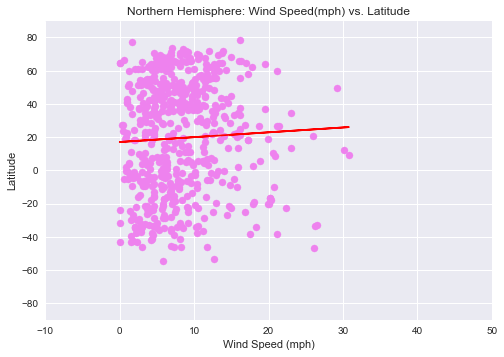

In [93]:
#limit the coordinates to the northern hemisphere
#Range of latitudes and longitudes
lat_range = (0, 90)
lng_range = (0, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)




plt.scatter(weather_data['Wind Speed'], weather_data['Latitude'], color='violet', s=50)

x_values = weather_data['Wind Speed']
y_values = weather_data['Latitude']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.plot(x_values,regress_values,"r-")
plt.title("Northern Hemisphere: Wind Speed(mph) vs. Latitude")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.savefig('northern_hemisphere_wind_speed_vs_latitude_plot')
plt.xlim(-10,50)
plt.ylim(-90,90)
print(line_eq)
display(print(f"The r-value is: {rvalue**2}."))

plt.savefig('/Users/tmc/Desktop/HW_6_API_Python_Challenge/WeatherPy/output_data/northern_hemisphere_wind_speed_vs_latitude_plot')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.29x +17.05
The r-value is: 0.002109409490500044.


None

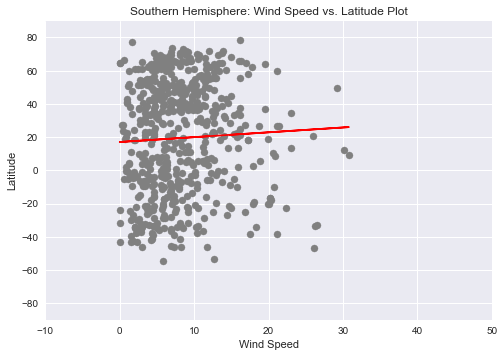

In [95]:

#limit the coordinates to the Southern hemisphere
#Range of latitudes and longitudes
lat_range = (-90, 0)
lng_range = (-180, 0)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


plt.scatter(weather_data['Wind Speed'], weather_data['Latitude'], color='grey', s=50)

x_values = weather_data['Wind Speed']
y_values = weather_data['Latitude']

plt.plot(x_values,regress_values,"r-")



plt.title("Southern Hemisphere: Wind Speed vs. Latitude Plot")
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.savefig('southern_hemisphere_wind_speed_vs_latitude_plot')
plt.xlim(-10,50)
plt.ylim(-90,90)
print(line_eq)
display(print(f"The r-value is: {rvalue**2}."))
plt.savefig('/Users/tmc/Desktop/HW_6_API_Python_Challenge/WeatherPy/output_data/southern_hemisphere_wind_speed_vs_latitude_plot')